In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from highD.HighD import HighD
from highD.Filter import Filter
from highD.Plot import Plot
from highD.Visualizer import GIF
from highD.helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogMod-driver-behavior-model\highd_tools


## Read dataset
Read highd files from the defined `Data_directory` folder.

- The function takes in `ids` which is a list of id (e.g. ["01", "02"])
- Returns two variables: `dfs`, `images`
- `dfs` is a tuple (recordingMeta, tracksMeta, tracks)
- `images` is a list of highway images

In [2]:
ids = ["01", "02"]
highD = HighD(ids, DATA_DIRECTORY)

dataset_id = 2 # remember that the dataset_id is 1-based
_, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)

Loaded data and image for dataset 01.
Loaded data and image for dataset 02.


In [17]:
df.head()

,dataset_id,locationId,frame,id,class,drivingDirection,laneId,x,y,width,...,ttc,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId
0,1,2,1,1,Car,2,5,362.26,21.68,4.85,...,0.0,0.0,0,3,0,0,0,0,0,6
1,1,2,2,1,Car,2,5,363.73,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
2,1,2,3,1,Car,2,5,365.27,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
3,1,2,4,1,Car,2,5,366.83,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
4,1,2,5,1,Car,2,5,368.42,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6


# Tracks Meta Distributions 

Filtering by colName class, val Car
Filtering by colName minTHW, val (0, 200)
Filtering by colName minTTC, val (0, 200)
Filtered dataframe from 1113 to 617 rows, ratio 0.5543575920934412


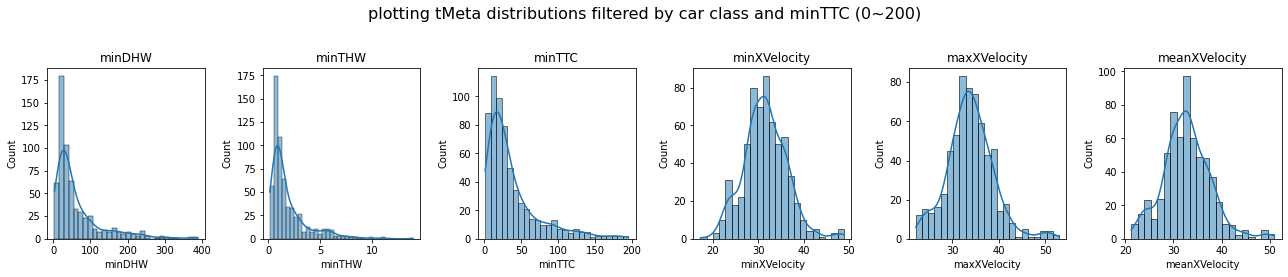

In [3]:
filtered_tMeta = Filter.filter_dataframe(tMeta, 
                                        'class', 'Car', 
                                        'minTHW', (0,200),
                                        'minTTC', (0,200))
Plot.plot_tMeta_distributions(filtered_tMeta, 'plotting tMeta distributions filtered by car class and minTTC (0~200)')

## Velocity distribution of one dataset

Filtering by colName class, val Car
Filtered dataframe from 378115 to 266531 rows, ratio 0.7048940137259828


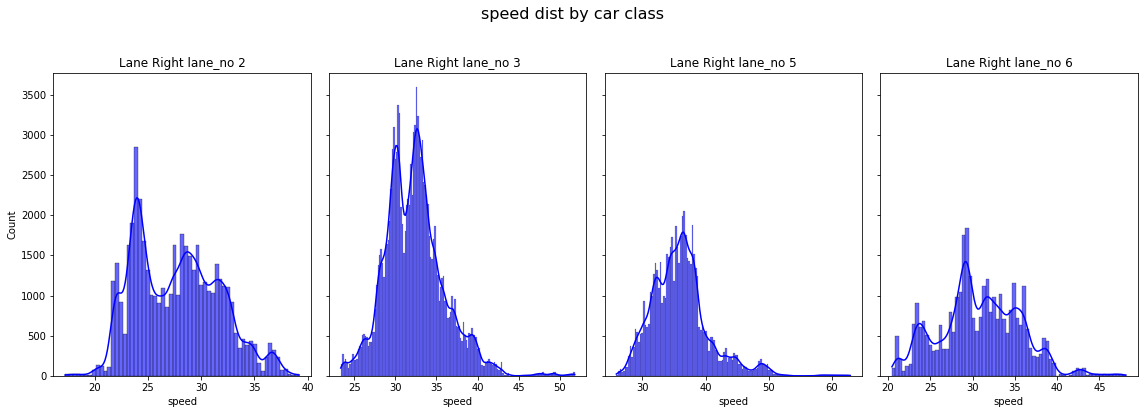

Filtering by colName class, val Truck
Filtered dataframe from 378115 to 111584 rows, ratio 0.2951059862740172


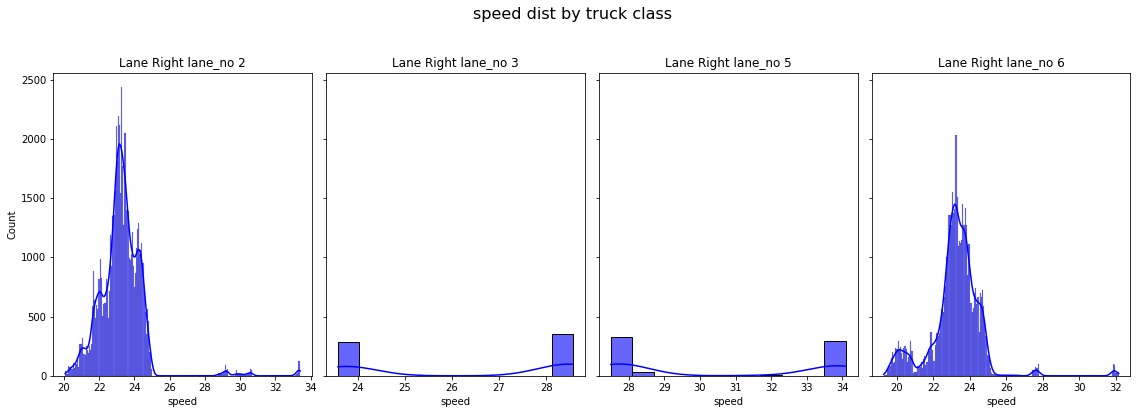

In [4]:
filtered_df = Filter.filter_dataframe(df, 
                                     'class', 'Car')
Plot.plot_speed_distribution_by_lane(filtered_df, 'speed dist by car class')

filtered_df = Filter.filter_dataframe(df,
                                     'class', 'Truck')
Plot.plot_speed_distribution_by_lane(filtered_df, 'speed dist by truck class')


### Plot distribution from tracks 

Filtering by colName class, val Car
Filtering by colName ttc, val (0, 200)
Filtered dataframe from 378115 to 164889 rows, ratio 0.4360816153815638


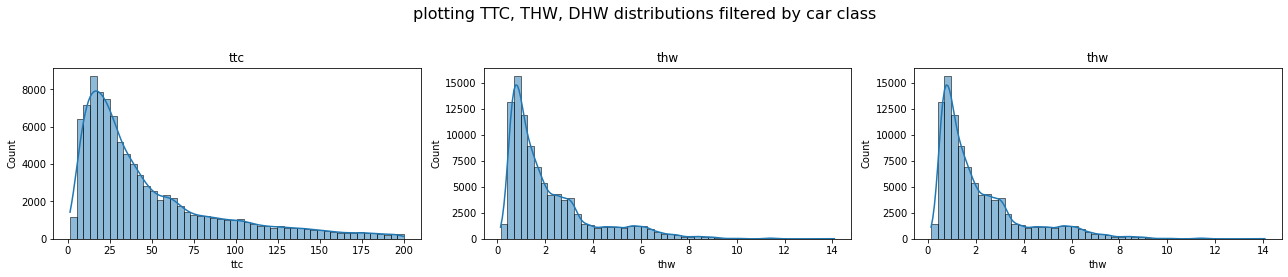

In [6]:
# Call the function with a filtered DataFrame, a title, and any number of columns
filtered_df = Filter.filter_dataframe(df,
                                     'class', 'Car', 
                                     'ttc', (0,200))
Plot.plot_tracks_distributions(filtered_df, 'ttc', 'thw', 'thw',
                               title='plotting TTC, THW, DHW distributions filtered by car class')

### Calculated TTC == ttc in dataset
In the helper.py has creates similar values as in the dataset

returning with calculated TTC as a new column. Values follow same trend but not exact
Filtering by colName class, val Car
Filtering by colName ttc, val (0, 200)
Filtering by colName calculated_ttc, val (0, 200)
Filtered dataframe from 378115 to 162996 rows, ratio 0.43107520198881294
KS test statistic:  (0.03690888119953861, 6.744948643418373e-97)


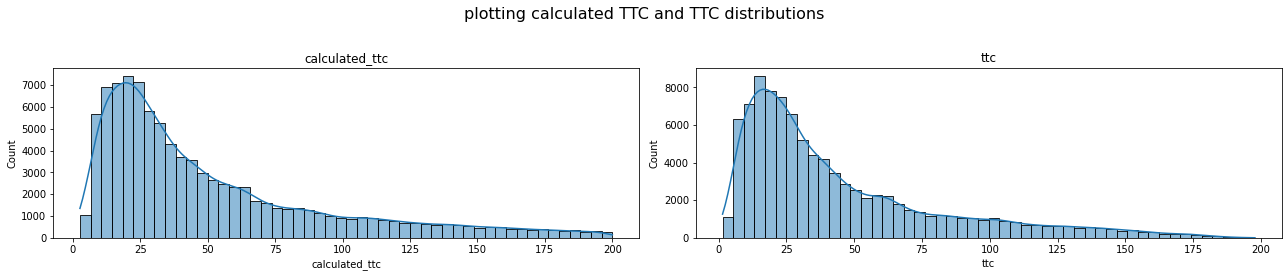

In [7]:
df_with_calc_ttc = calculate_ttc(df)

filtered_df = Filter.filter_dataframe(df_with_calc_ttc,
                                     'class', 'Car',
                                     'ttc', (0,200),
                                     'calculated_ttc', (0,200))

print('KS test statistic: ', ks_test_ttc(filtered_df))
Plot.plot_tracks_distributions(filtered_df, 
                              'calculated_ttc', 'ttc',
                              title='plotting calculated TTC and TTC distributions')

In [8]:
# todo acceleration distribution

# Code for driving direction and lane id

In [19]:
df.columns

Index(['dataset_id', 'locationId', 'frame', 'id', 'class', 'drivingDirection',
       'laneId', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'frontSightDistance',
       'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity',
       'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId',
       'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId',
       'rightFollowingId'],
      dtype='object')

[2 3] [5 6]
